In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import argparse
import sys

In [2]:
df = pd.read_table("Taxonomic-Binning/tax.summary.all.tab", header=0, index_col=0)
mapping_file = pd.read_table("mapping_file.tab", header=0, index_col=0)

In [10]:
def search(myDict, lookup):
    for key, value in myDict.items():
            if lookup in key:
                return str(value)
            else:
                pass
    
def select_taxonomic_rank(df, taxa_lev, col_or_row, metadata=False):
    """Select taxonomic level at which to filter the dataframe by. 
       Usage: df=dataframe to filter, taxa_level=taxonomic level - lowercase,
       col_row=whether to filter by columns or rows, metadata=include metadata variables """
    id_map = {"phylum":"p__","class":"c__",
              "order":"o__","family":"f__",
              "genus":"g__"
              } 
    sel_id = search(id_map, taxa_lev)
    meta = df.select_dtypes(exclude=['float64'])
    if col_or_row == "row":
        if not metadata:
            filtered = df[df.index.str.contains(sel_id)]
            return filtered
        elif metadata == True:
            filtered = df[df.index.str.contains(sel_id)]
            merged = pd.concat([meta, filtered], axis=0)
            return merged
    elif col_or_row == "column":
        if not metadata:
            filtered = df.filter(regex=sel_id, axis=1)
            return filtered
        elif metadata == True:
            filtered = df.filter(regex=sel_id, axis=1)
            merged = pd.concat([meta, filtered], axis=1)
            return merged

def select_subset(df, col, subset, col_2=None, subset2=None):
    """Select subset of data based on metadata.
    Usage: col=column containing metavariable to filter by, 
    subset=metavariable in column to filter by,
    col_2/subset_2= select second set of metavariables to filter by"""
    if not subset2:
        df_subset = df[df[col] == subset]
        df_subset = df_subset.select_dtypes(exclude=['object'])
        return df_subset
    elif subset2: 
            df_subset = df[df[col] == subset]
            df_subset_2 = df_subset[df_subset[col_2] == subset2]
            df_subset_2 = df_subset_2.select_dtypes(exclude=['object'])
            return df_subset_2

def select_taxa(df, taxa):
    """Select taxa of interest"""
    taxa_only = df[df.index.isin(taxa)]
    return taxa_only
    
def plot_stacked_bar(df, T=None):
    """plot a stacked bar graph of microbiome compositional data"""
    if not T:
        width = len(df.index)
        sns.set()
        plt = df.plot(kind='bar', 
                       stacked=True, 
                       figsize=(15,8), 
                       legend=False, 
                       grid=False, 
                       width=0.75)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
        return plt
    elif T: 
        df = df.T
        width = len(df.columns)
        sns.set()
        plt = df.plot(kind='bar', 
                       stacked=True, 
                       figsize=(15,8), 
                       legend=False, grid=False, 
                       width=0.75)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
        return plt
        
def plot_area(df, T=None):
    """plot a stacked area graph of microbiome compositional data"""
    if not T:
        sns.set()
        plt = df.plot(kind='area', 
                       figsize=(15,8), 
                       legend=False, 
                       grid=False)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize='medium')
        plt.tight_layout()
        return plt
    elif T:
        df = df.T
        sns.set()
        plt = df.plot(kind=='area', 
                       figsize=(15,8), 
                       legend=False, 
                       grid=False)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
        return plt
    
def calc_plot_means(df, df_type, col=None, taxa_lev=None, col_or_row=None):
    """calculate mean for entire subgroup/means for selected group and 
       plot pie or stacked bar respectively"""   
    if  df_type == "df":
        mean = df.mean()
        sns.set()
        plt = mean.plot(kind='pie', legend=True)
        return plt
    elif df_type == "df_metadata":
        taxonomic_level = select_taxonomic_rank(df, taxa_lev, col_or_row, metadata=True)
        if col:
            mean = taxonomic_level.groupby(col).mean()
            sns.set()
            plt =  mean.plot(kind='bar', 
                             stacked=True, 
                             legend=False, 
                             grid=False, width=0.75).legend(loc='center left', 
                                                            bbox_to_anchor=(1, 0.5), 
                                                            fontsize='medium')
            return plt

In [4]:
phylum = select_taxonomic_rank(df, "phylum", "row")
family = select_taxonomic_rank(df, "family", "row")
genus = select_taxonomic_rank(df, "genus", "row")

In [20]:
df_T = df.T
merged = pd.concat([mapping_file, df_T], axis=1)

In [21]:
wk_5 = select_subset(merged, "Age", "5wk", "Genotype", "tg/tg")
wk_5_phylum = select_taxonomic_rank(wk_5, "phylum", "column")

In [22]:
#def subset_taxa_abundance()
wk_5

,k__Bacteria,p__Actinobacteria,p__Bacteroidetes,p__Candidatus Saccharibacteria,p__Cyanobacteria/Chloroplast,p__Deferribacteres,p__Firmicutes,p__Proteobacteria,p__Tenericutes,p__unknown_ Bacteria,...,g__unknown_ Erysipelotrichaceae,g__unknown_ Firmicutes,g__unknown_ Lachnospiraceae,g__unknown_ Nocardioidaceae,g__unknown_ Peptostreptococcaceae,g__unknown_ Porphyromonadaceae,g__unknown_ Ruminococcaceae,g__unknown_ Staphylococcaceae,g__Vampirovibrio,g__Vibrio
01.AV967,100.0,0.233623,16.697711,0.476717,0.003157,3.753749,76.170481,1.528019,0.883978,0.249408,...,0.022099,0.189424,43.936859,0.000000,0.0,3.163378,5.464878,0.0,0.489345,0.0
02.AV968,100.0,0.055794,10.889909,0.284040,0.000000,9.134945,78.004616,0.928204,0.654308,0.048185,...,0.015216,0.213030,45.312064,0.000000,0.0,2.386447,4.590297,0.0,0.088763,0.0
03.AV971,100.0,0.262543,4.786909,0.751663,0.000000,5.409099,86.423305,1.729905,0.618594,0.014386,...,0.269736,0.614997,48.516454,0.000000,0.0,1.233591,3.193670,0.0,0.176227,0.0
04.AV972,100.0,0.073460,20.015217,0.695246,0.000000,3.728093,72.507608,1.477070,1.361633,0.139049,...,0.060342,0.802812,44.306853,0.000000,0.0,6.453983,3.465736,0.0,0.514220,0.0
05.AV974,100.0,0.059183,9.051230,0.388385,0.000000,3.573146,85.307934,1.031996,0.573331,0.000000,...,0.062881,0.310708,51.019049,0.003699,0.0,2.940633,4.279638,0.0,0.077677,0.0
06.AV996,100.0,0.032566,5.669717,0.182369,0.000000,4.200997,88.826652,0.674113,0.367994,0.045592,...,0.009770,0.130263,68.645586,0.000000,0.0,1.113753,2.286124,0.0,0.055362,0.0


In [23]:
sns.color_palette()

[(0.29803921568627451, 0.44705882352941179, 0.69019607843137254),
 (0.33333333333333331, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.30588235294117649, 0.32156862745098042),
 (0.50588235294117645, 0.44705882352941179, 0.69803921568627447),
 (0.80000000000000004, 0.72549019607843135, 0.45490196078431372),
 (0.39215686274509803, 0.70980392156862748, 0.80392156862745101)]

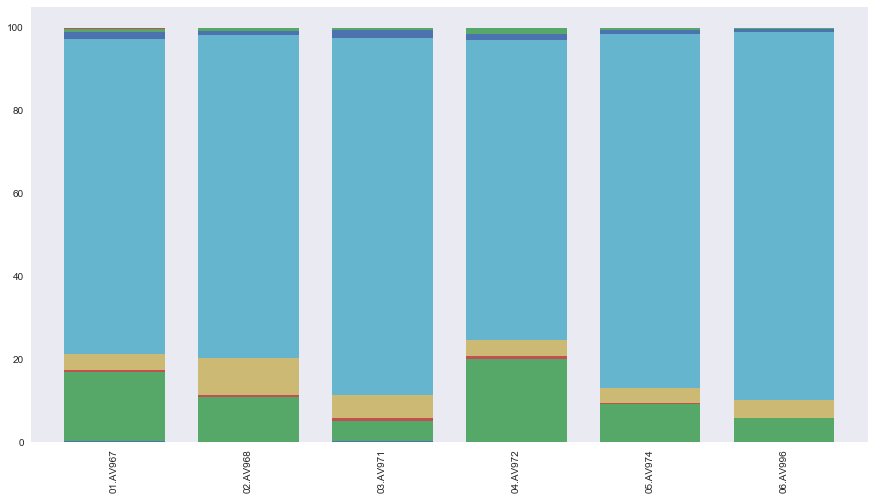

In [57]:
plot_stacked_bar(wk_5_phylum)

,67.AV770T,35.AV590,25.AV608,18.AV863,06.AV996,91.AV609,19.AV864,79.AV567,82.AV579,55.AV717T,...,09.AV584,41.AV527,51.AV612T,32.AV572,85.AV865,33.AV586,37.AV598,16.AV816,48.AV551T,72.AV770TA
g__Vampirovibrio,0.595257,0.134022,0.047523,0.251408,0.055362,0.12607,0.46111,0.169376,0.152156,0.221221,...,0.162239,0.208534,0.075655,0.072766,0.372945,0.206077,0.08205,0.143991,0.264242,0.550263
g__Vibrio,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


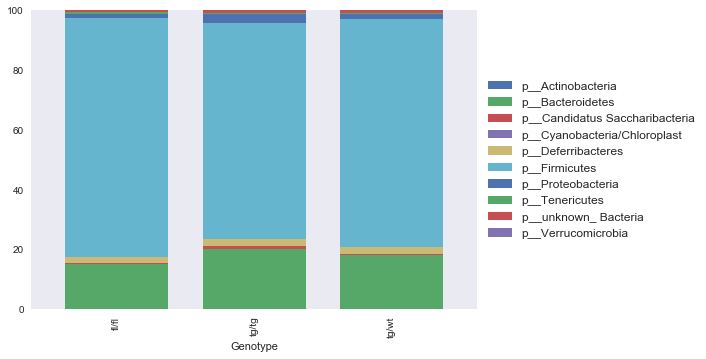

In [26]:
calc_plot_means(merged, df_type="df_metadata", col="Genotype", taxa_lev='phylum', col_or_row="column")